# ml06. Decision Tree

### 의사 결정 트리는 다양한 규칙을 순차적으로 적용하면서 , 독립변수의 공간을 분류하고
### 기준값을 정하는 지도 학습 모델
### 매우 직관적인 분류 모델이고 자료의 결과를 해석하기 용이해서 많이 사용
### 분류

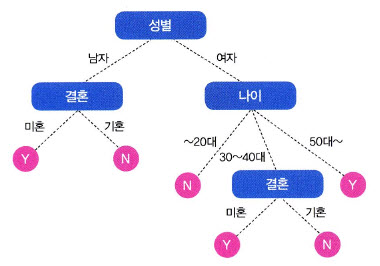

In [6]:
from IPython.display import Image
Image("datasets/decisiontree01.jpg")

In [7]:
import pandas as pd
import numpy as np

## Step1 :: 데이터 준비 및 기본 설정

In [8]:
# Breast Cancer (데이터셋 가져오기)
uci_path="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df=pd.read_csv(uci_path,header=None)

In [17]:
# 열 이름 지정

df.columns=['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nuclei','mitoses','class']

In [18]:
pd.set_optiohttp://localhost:8888/notebooks/ml06_Decision_Tree.ipynb#Step2-:-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%83%90%EC%83%89n('display.max_columns',15)

## Step2 : 데이터 탐색

In [19]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id               699 non-null int64
clump            699 non-null int64
cell_size        699 non-null int64
cell_shape       699 non-null int64
adhesion         699 non-null int64
epithlial        699 non-null int64
bare_nuclei      699 non-null object
chromatin        699 non-null int64
normal_nuclei    699 non-null int64
mitoses          699 non-null int64
class            699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [25]:
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,chromatin,normal_nuclei,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [32]:
# bare_nuclei 열의 고유값확인
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [31]:
#bare_nuclie 열의 자료형 변경(문자열=>숫자)
df['bare_nuclei'].replace('?',np.nan,inplace=True)

In [34]:
# 누락데이터 삭제
df.dropna(subset=['bare_nuclei'],axis=0,inplace=True)

In [36]:
df['bare_nuclei']=df['bare_nuclei'].astype('int')

In [38]:
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nuclei,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Step3 : 데이터셋 구분 : train data / test data

In [49]:
# 속성선택
X=df[['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nuclei','mitoses','class']]
y=df['class']

In [50]:
#설명변수 데이터를 정규화
from sklearn import preprocessing #전처리
X=preprocessing.StandardScaler().fit(X).transform(X)

In [51]:
#train data & test구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print("train data: ", X_train.shape) # 변경
print("test data: ", X_test.shape)    # 변경

train data:  (478, 11)
test data:  (205, 11)


## Step4 :: Decision Tree 분류 모형 - scikit 사용

In [59]:
# skearn 라이브러리에서 Deicision Tree 분류 모형 다루기
from sklearn import tree

In [60]:
# criterion = 'entropy' : 각 분기점에서 최적의 속성을 찾기위한 분류 정도의 평가 기준
tree_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [61]:
# train data model fitting(모델 연습)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
#test data를 가지고 y_hat 예측(분류)
y_hat=tree_model.predict(X_test)

In [65]:
print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [67]:
# 모형의 성능 
from sklearn import metrics
tree_matrix=metrics.confusion_matrix(y_test,y_hat)

In [86]:
tree_matrix

array([[131,   0],
       [  0,  74]], dtype=int64)

In [87]:
#모델 성능 평가-평가 지표 계산
#Precison(정확도): True로 예측한 분석대상중에서 실제값이 True인 비율(정확성)
#Recall(재현율): 실제값이 True인 분석 대상 중에서 True로 예측하여 모델에 적중한 비율
#F1-Score(F1지표):정확도와 재현율이 균등하게 반영된 조화평균
decision_report=metrics.classification_report(y_test, y_hat)
print(decision_report)

             precision    recall  f1-score   support

          2       1.00      1.00      1.00       131
          4       1.00      1.00      1.00        74

avg / total       1.00      1.00      1.00       205

